# Ordinary Least Squares Assumptions

In Regression Analysis, there are several assumptions that must be accepted to make the OLS is working properly. These assumptions could be described as follows:
- Linearity
- No Endogeneity
- Homoscedasticity
- No Autocorrelation
- No Multicollinearity

### Importing all of the libraries needed

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import sklearn
from sklearn import preprocessing

sns.set()

In [32]:
import matplotlib
print("Pandas Version: ", pd.__version__)
print("NumPy Version: ", np.__version__)
print("Matplotlib Version: ", matplotlib.__version__)
print("Seaborn Version: ", sns.__version__)
print("Scikit-Learn Version: ", sklearn.__version__)

Pandas Version:  2.1.3
NumPy Version:  1.26.2
Matplotlib Version:  3.8.2
Seaborn Version:  0.13.0
Scikit-Learn Version:  1.3.2


## Load The Data

In [33]:
dataset = pd.read_csv('MELBOURNE_CLEANED_DATASET.csv')
dataset.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,Abbotsford,2,h,870000.0,SS,Jellis,2016-09-03,2.5,3067.0,1.0,1.0,126.0,136.0,1970.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan
1,Abbotsford,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,1.0,1.0,202.0,136.0,1970.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan
2,Abbotsford,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan
3,Abbotsford,3,u,870000.0,VB,Rounds,2016-02-04,2.5,3067.0,2.0,1.0,0.0,136.0,1970.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan
4,Abbotsford,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan


### Refining Variable Types
- Categorical Variables

In [34]:
# Identifying object column and converting it to categorical variable
print(dataset.select_dtypes(["object"]).columns)

categorical = [
    "Suburb",
    "Type",
    "Method",
    "SellerG",
    "Date",
    "CouncilArea",
    "Regionname",
]

for cat_variables in categorical:
    dataset[cat_variables] = dataset[cat_variables].astype('category')

Index(['Suburb', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [35]:
# Convert data column to date object
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%Y-%m-%d', dayfirst=True)
dataset['Date'].head(5)

0   2016-09-03
1   2016-12-03
2   2016-02-04
3   2016-02-04
4   2017-03-04
Name: Date, dtype: category
Categories (78, datetime64[ns]): [2016-01-28, 2016-02-04, 2016-04-16, 2016-04-23, ..., 2018-02-24, 2018-03-03, 2018-03-10, 2018-03-17]

In [36]:
# Since postal code can be converted as categorical data type, thus
postal = ['Postcode']

for postcode in postal:
    dataset[postcode] = dataset[postcode].astype('category')

In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29238 entries, 0 to 29237
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Suburb        29238 non-null  category
 1   Rooms         29238 non-null  int64   
 2   Type          29238 non-null  category
 3   Price         29238 non-null  float64 
 4   Method        29238 non-null  category
 5   SellerG       29238 non-null  category
 6   Date          29238 non-null  category
 7   Distance      29238 non-null  float64 
 8   Postcode      29238 non-null  category
 9   Bathroom      29238 non-null  float64 
 10  Car           29238 non-null  float64 
 11  Landsize      29238 non-null  float64 
 12  BuildingArea  29238 non-null  float64 
 13  YearBuilt     29238 non-null  float64 
 14  CouncilArea   29236 non-null  category
 15  Lattitude     29238 non-null  float64 
 16  Longtitude    29238 non-null  float64 
 17  Regionname    29236 non-null  category
dtypes: cat

In [38]:
dataset.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Suburb,29238,319,Reservoir,764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,29238.0,NaN,NaN,NaN,2.832102,0.803905,1.0,2.0,3.0,3.0,4.0
Type,29238,3,h,18954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,29238.0,NaN,NaN,NaN,939008.094227,426992.266625,85000.0,670000.0,870000.0,1075000.0,3200000.0
Method,29238,9,S,16893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SellerG,29238,351,Nelson,2850,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,29238,78,2017-10-28 00:00:00,900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,29238.0,NaN,NaN,NaN,10.732372,6.127501,0.0,6.3,10.1,13.9,35.2
Postcode,29238.0,189.0,3073.0,764.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bathroom,29238.0,NaN,NaN,NaN,1.58359,0.496084,0.0,1.0,2.0,2.0,2.0


## Linearity

Let's check our data for Linearity Assumption using Scatter Plot

I want to filter the columns that I want to set as my Independent Variables, which are:
- `Suburb`
- `Type`
- `Method`
- `CouncilArea`
- `Regionname`
  
- `Rooms`
- `Distance`
- `Bathroom`
- `Car`
- `Landsize`
- `BuildingArea`
- `YearBuilt`

While the Dependent Variable is the `Price`

In [43]:
heatmap_columns = [
    "Rooms",
    "Price",
    "Distance",
    "Bathroom",
    "Car",
    "Landsize",
    "BuildingArea",
    "YearBuilt"
]

#### Pair Plot

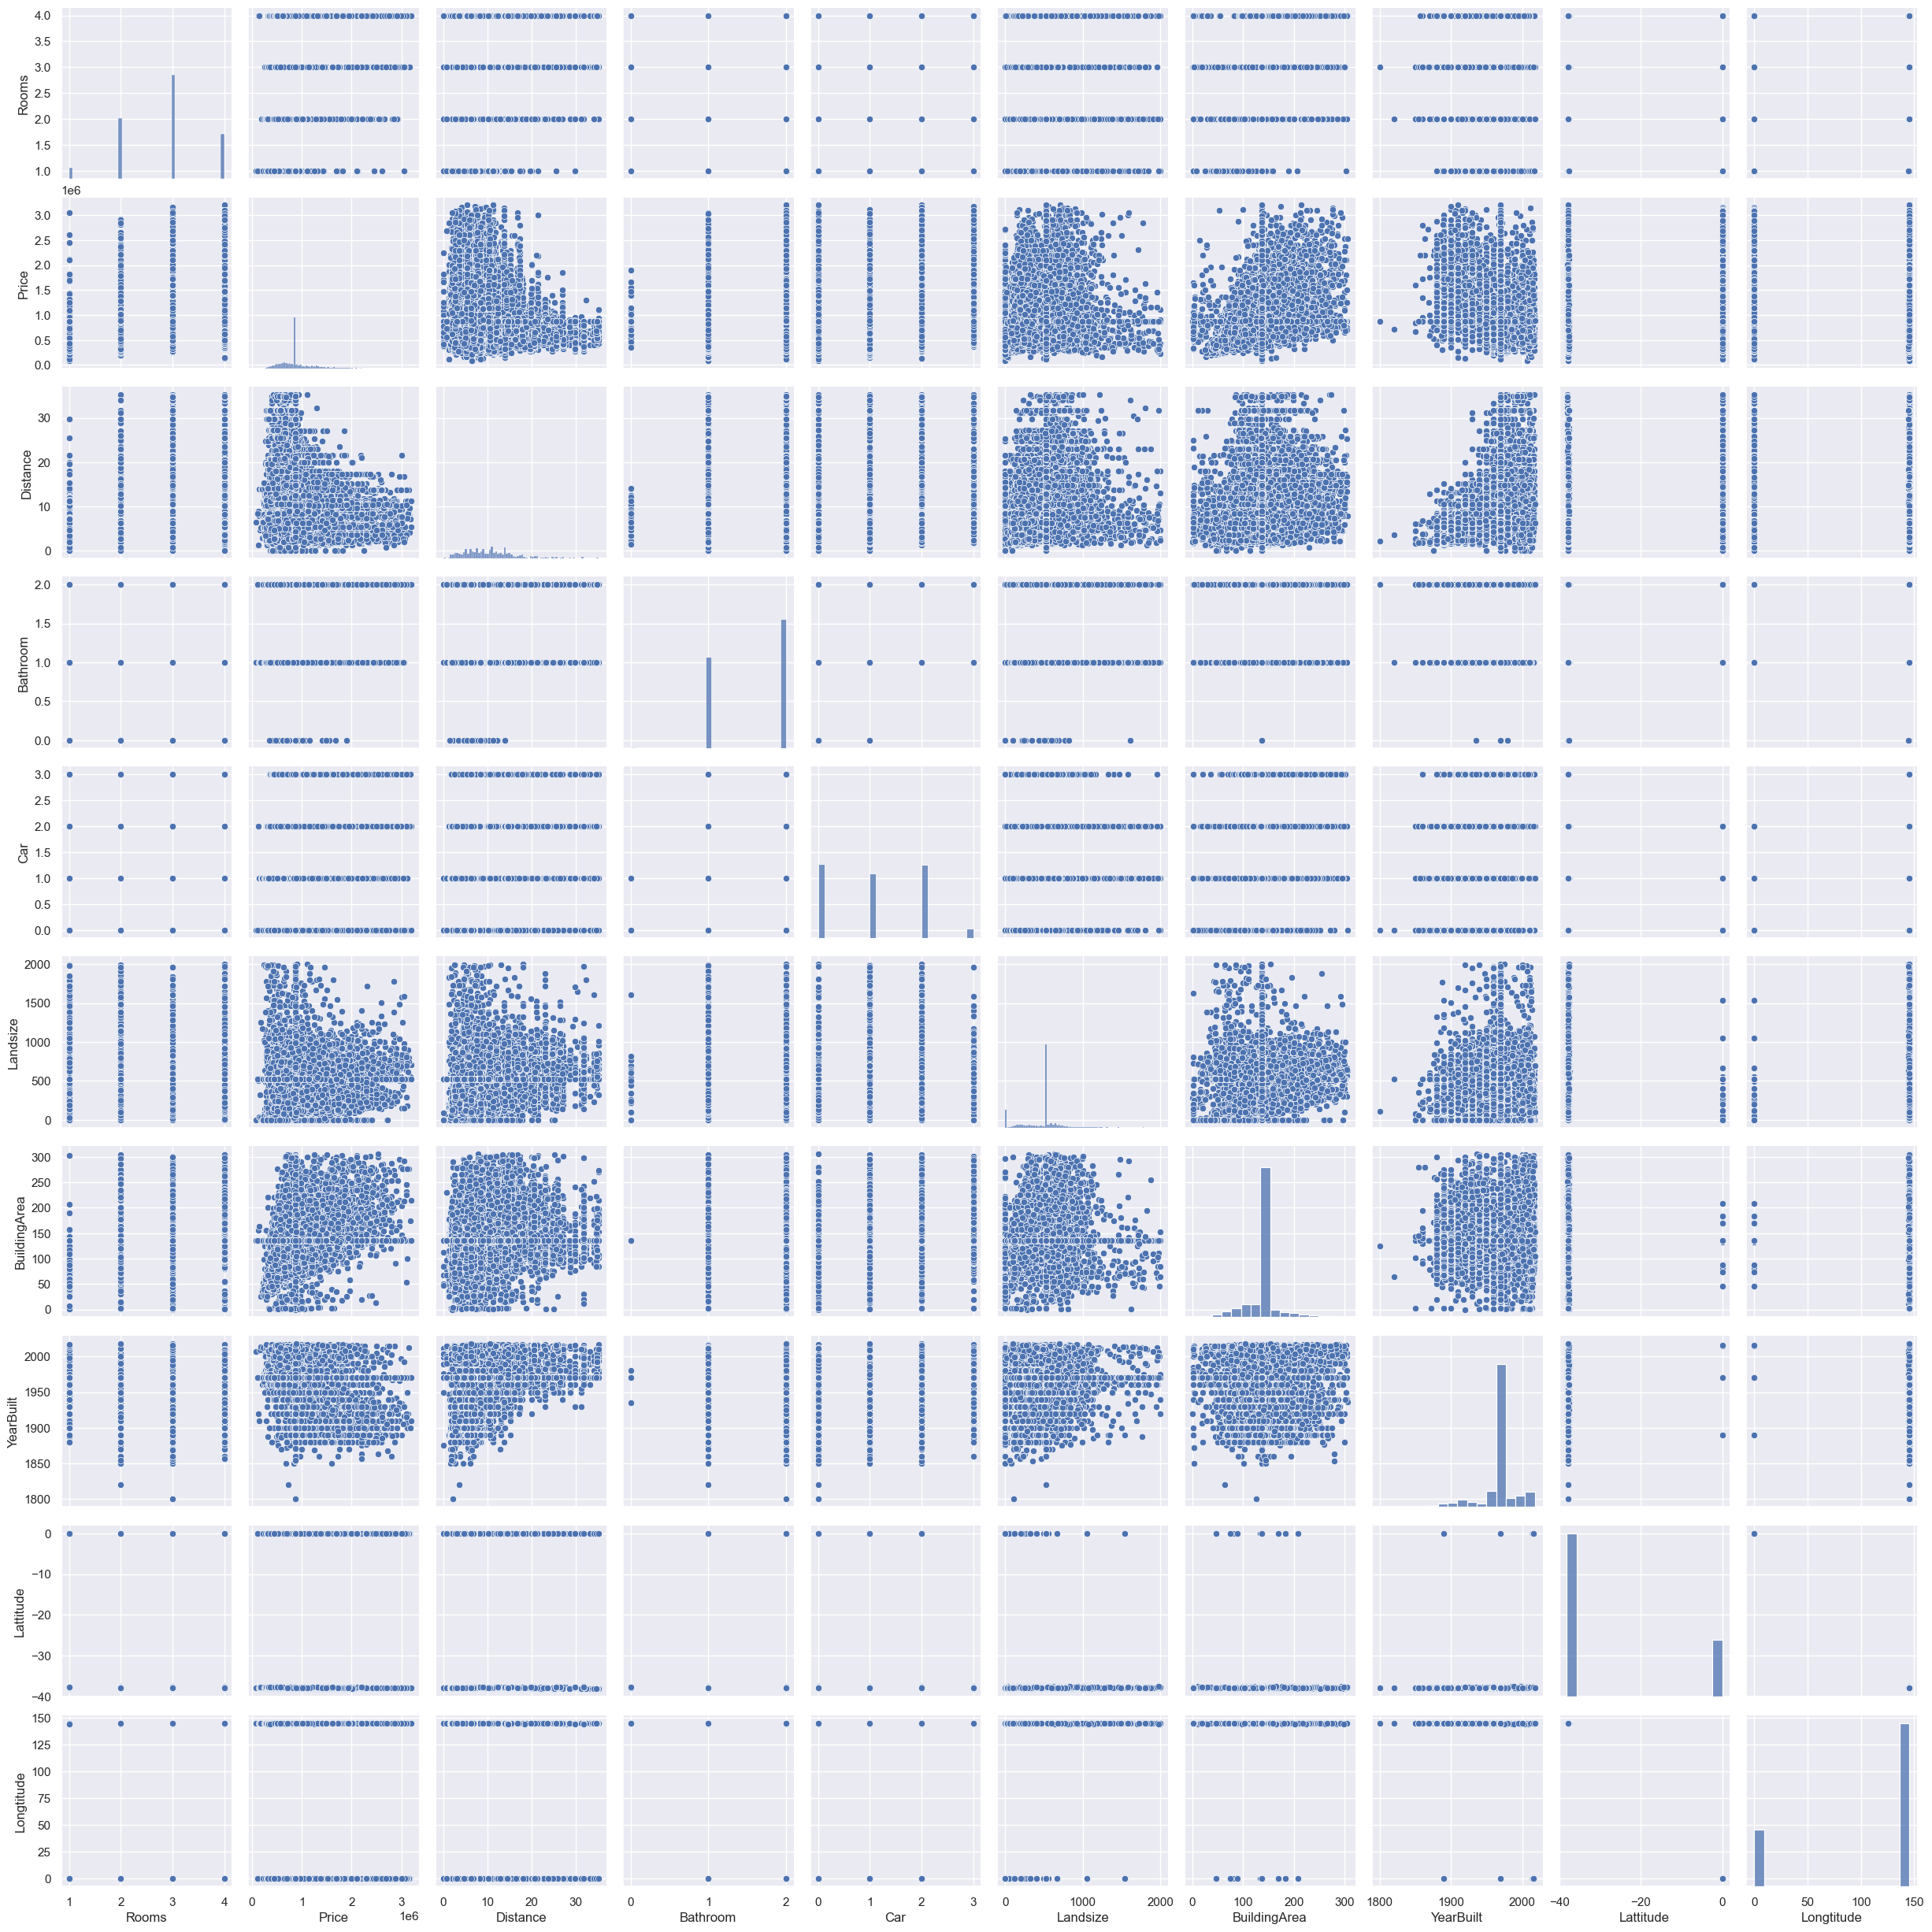

In [39]:
sns.pairplot(dataset)

#### Heatmap

<Axes: >

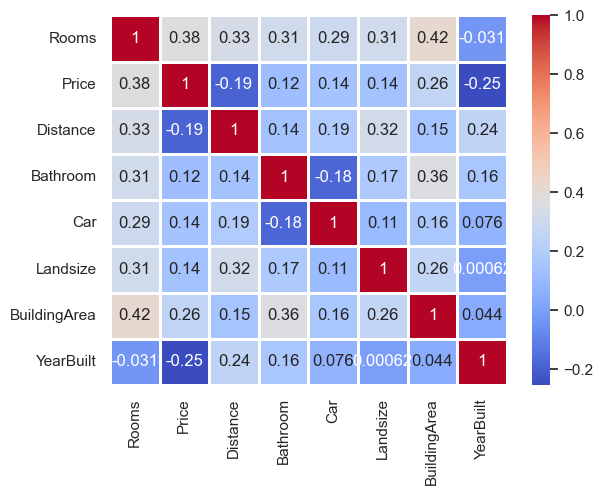

In [44]:
sns.heatmap(dataset[heatmap_columns].corr(), cmap="coolwarm", linewidth=1, annot=True)